In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cancer_reg.csv


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

## Reading the data and removing duplicate values

In [2]:
CancerData = pd.read_csv('cancer_reg.csv', encoding='latin')
print('Shape before removing duplicates', CancerData.shape)
CancerData = CancerData.drop_duplicates()
print('Shape before removing duplicates', CancerData.shape)
CancerData.head()

Shape before removing duplicates (3047, 34)
Shape before removing duplicates (3047, 34)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
CancerData.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

## Arranging the Target Variable

In [4]:
CancerData = CancerData[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'TARGET_deathRate']]

In [5]:
CancerData.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


## Data Exploration

In [6]:
CancerData.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,...,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,178.664063
std,1416.356223,504.134286,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,...,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,27.751511
min,6.000000,3.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,76.000000,28.000000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,...,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,161.200000
50%,171.000000,61.000000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,...,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,178.100000
75%,518.000000,149.000000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,...,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,195.200000
max,38150.000000,14010.000000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,362.800000


In [7]:
CancerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   binnedInc                3047 non-null   object 
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

In [8]:
CancerData.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

## Dropping unnecessary columns from the data

In [9]:
CancerData.drop(['PctPrivateCoverageAlone', 'PctSomeCol18_24'], axis=1, inplace=True)

In [10]:
#checking for the sum of nullvalues per column
CancerData.isna().sum()

avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
binnedInc                   0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
Geography                   0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over        152
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
TARGET_deathRate            0
dtype: int64

#PctEmployed has 152 null rows.

In [11]:
CancerData.iloc[1:10,7:]

,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
1,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,7.5,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,9.5,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,2.5,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,2.0,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4
5,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",2.58,50.4,29.9,35.1,4.5,...,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476,176.0
6,"(37413.8, 40362.7]",42.6,42.2,43.5,"Okanogan County, Washington",2.42,54.1,26.1,41.4,5.8,...,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317,175.9
7,"(37413.8, 40362.7]",51.7,50.8,52.5,"Pacific County, Washington",2.24,52.7,27.3,33.9,2.2,...,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179,183.6
8,"(40362.7, 42724.4]",49.3,48.4,49.8,"Pend Oreille County, Washington",2.38,55.9,34.7,39.4,1.4,...,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583,190.5
9,"(54545.6, 61494.5]",35.8,34.7,37.0,"Pierce County, Washington",2.65,50.0,15.6,36.3,7.1,...,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430,177.8


In [12]:
#checking for the unique values

CancerData.nunique()

avgAnnCount                929
avgDeathsPerYear           608
incidenceRate             1506
medIncome                 2920
popEst2015                2999
povertyPercent             333
studyPerCap               1117
binnedInc                   10
MedianAge                  325
MedianAgeMale              298
MedianAgeFemale            296
Geography                 3047
AvgHouseholdSize           199
PercentMarried             362
PctNoHS18_24               405
PctHS18_24                 469
PctBachDeg18_24            219
PctHS25_Over               361
PctBachDeg25_Over          281
PctEmployed16_Over         409
PctUnemployed16_Over       195
PctPrivateCoverage         498
PctEmpPrivCoverage         450
PctPublicCoverage          395
PctPublicCoverageAlone     319
PctWhite                  3044
PctBlack                  2972
PctAsian                  2852
PctOtherRace              2903
PctMarriedHouseholds      3043
BirthRate                 3019
TARGET_deathRate          1053
dtype: i

## Dropping Geography after doing data exploration

In [13]:
CancerData.drop('Geography', axis=1, inplace=True)

In [14]:
CancerData.shape

(3047, 31)

In [15]:
CancerData.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


## Checking Distributions: Continuous

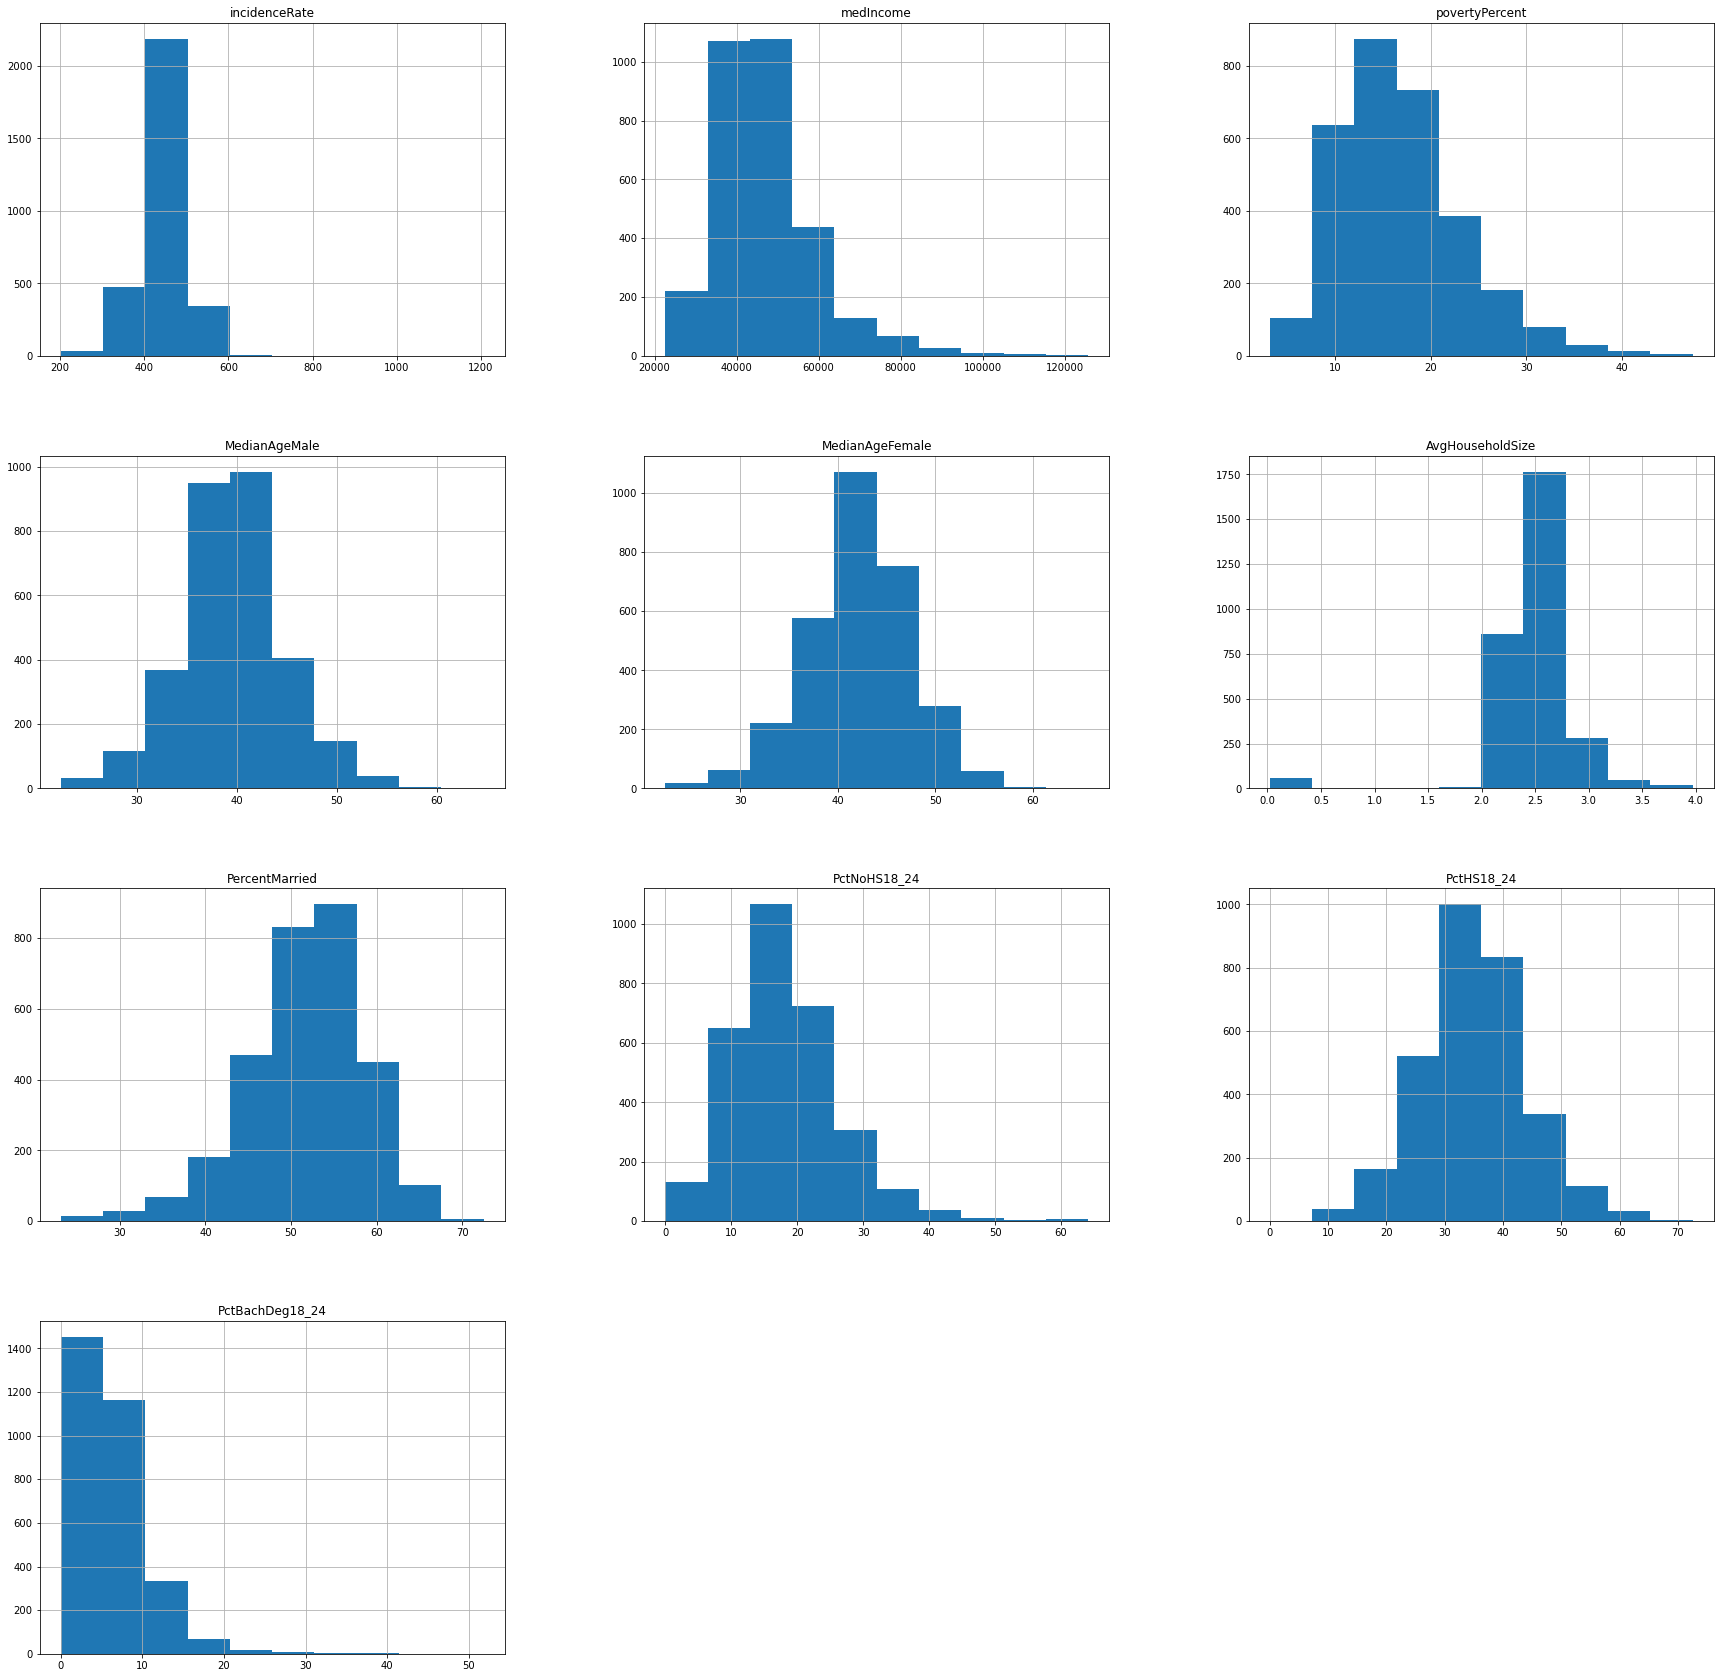

In [16]:
%matplotlib inline
histo=CancerData.hist(['incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24'], figsize=(30,30))

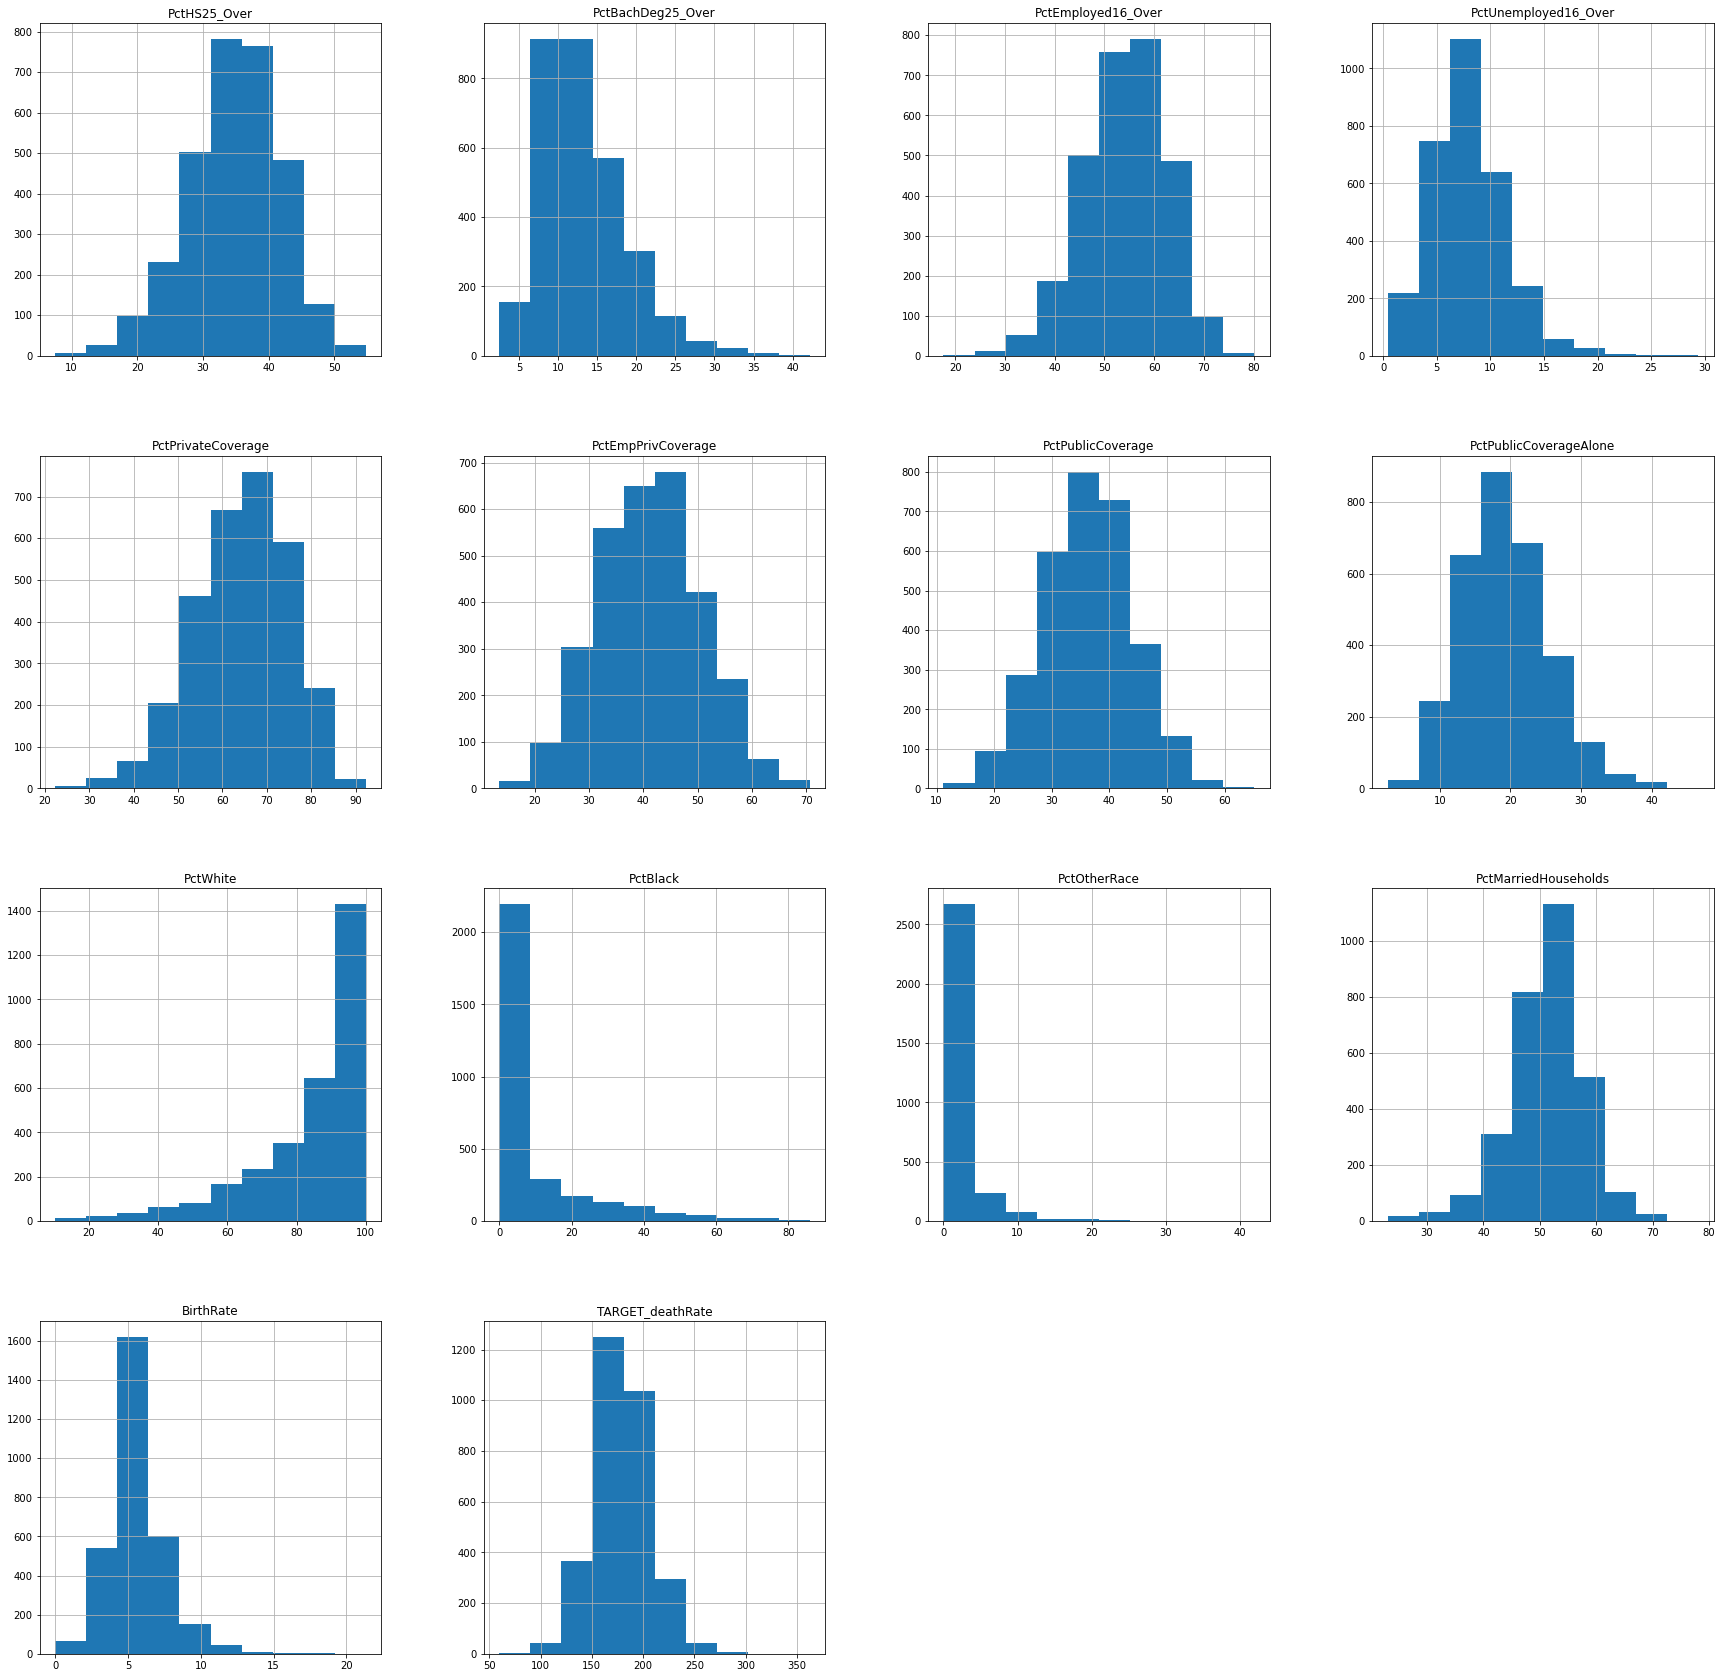

In [17]:
histo = CancerData.hist(['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'], figsize=(30,30))

## Choosing Continuous Cols depending on distribution

In [18]:
['incidenceRate', 'medIncome', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
'TARGET_deathRate']

['incidenceRate',
 'medIncome',
 'povertyPercent',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate',
 'TARGET_deathRate']

## Checking Distributions: Categorical

<AxesSubplot:xlabel='binnedInc'>

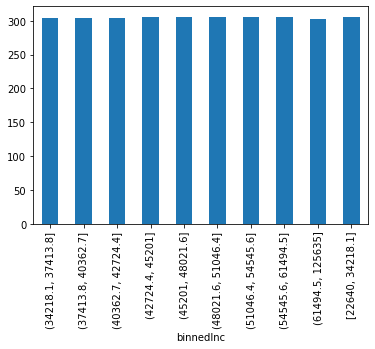

In [19]:
import matplotlib.pyplot as plt
CancerData.groupby('binnedInc').size().plot.bar()

## Checking The relationship: Continuous vs Continuous (Scatter plot)

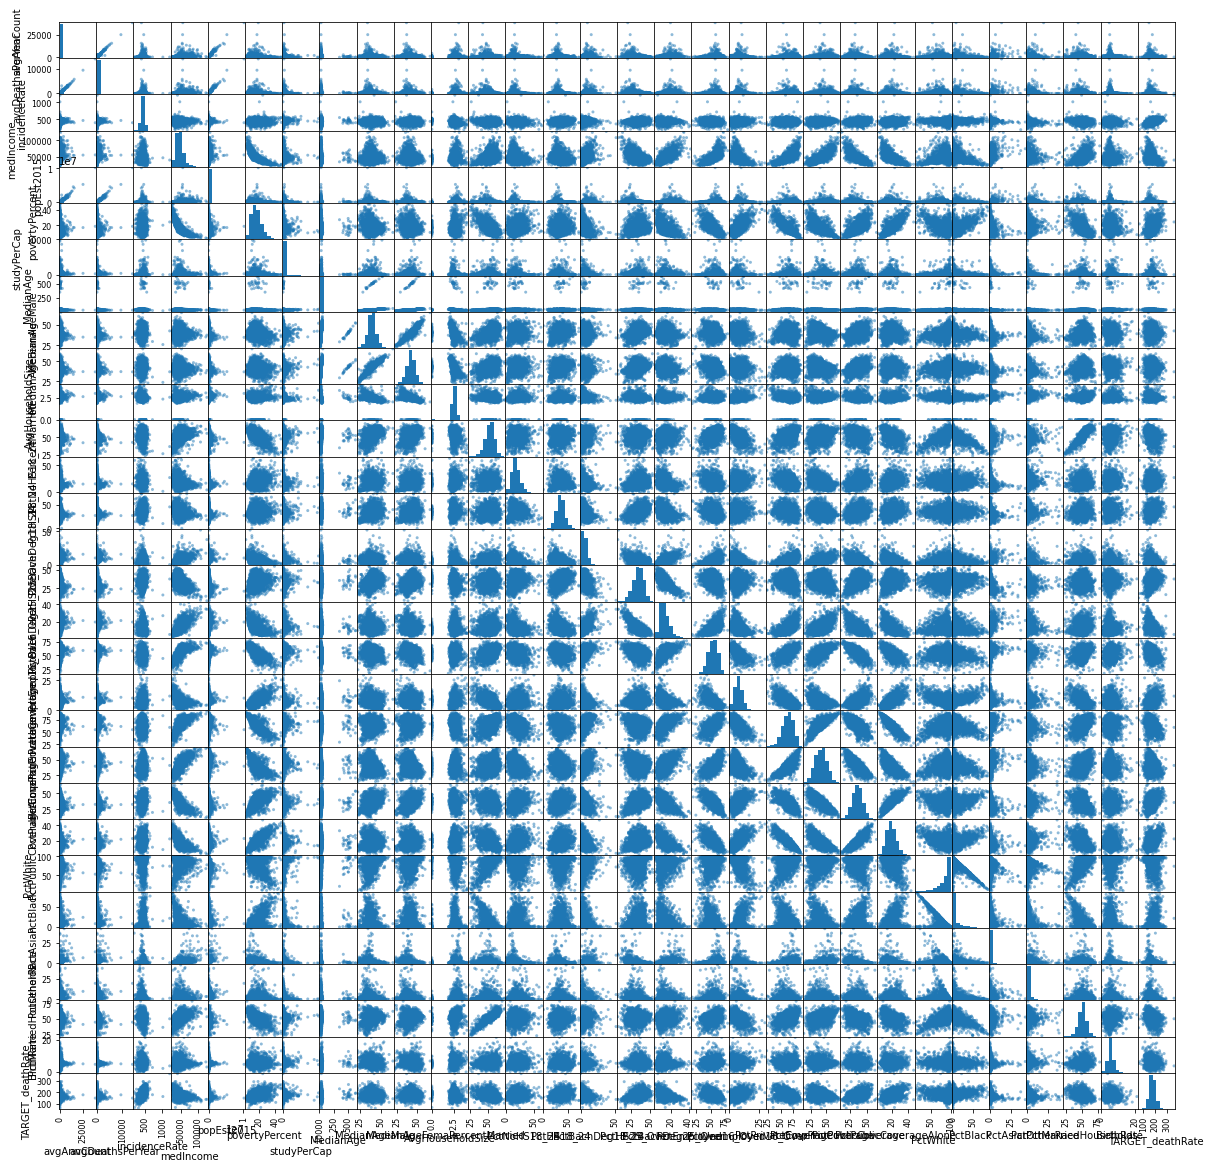

In [20]:
scatter = pd.plotting.scatter_matrix(CancerData, figsize=(20,20))

In [27]:
#encapsulating code for creating the scatter plot of each attribute against the response variable
# to study the correlation between each attribute and target variable.

def ConVSCon(inpData, Cols, Target):
    fig,subplot = plt.subplots(nrows = len(Cols), ncols = 1, figsize = (5,80))
    for ColName, PlotNumber in zip(Cols, range(len(Cols))):
        inpData.plot.scatter(x = ColName, y = Target, ax = subplot[PlotNumber])
        

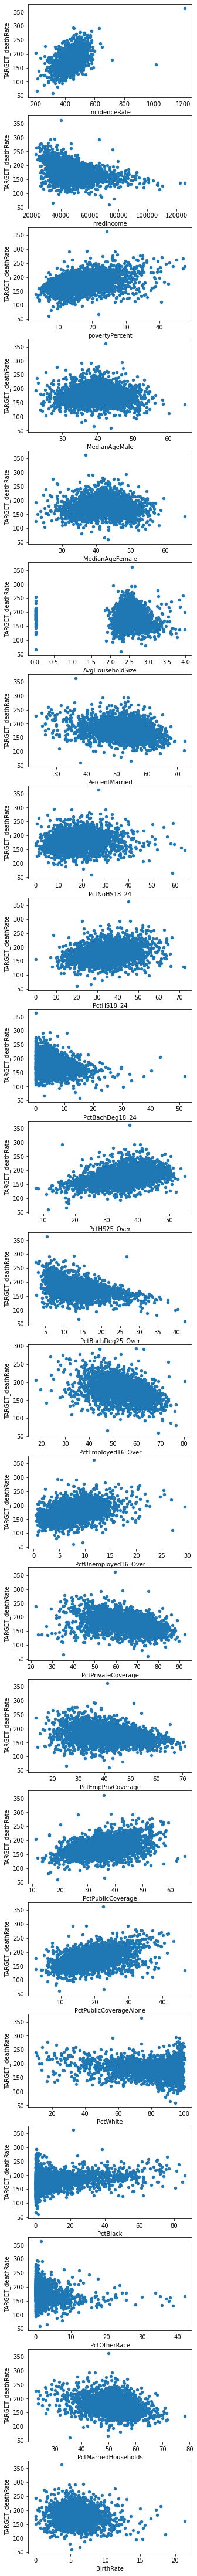

In [28]:
ConVSCon(inpData=CancerData, Cols=['incidenceRate', 'medIncome', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'], Target='TARGET_deathRate')

## Checking The relationship: Continuous vs Continuous

In [29]:
CoorData = CancerData.corr()

In [30]:
np.abs(CoorData['TARGET_deathRate']).sort_values(ascending=False)

TARGET_deathRate          1.000000
PctBachDeg25_Over         0.485477
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
medIncome                 0.428615
PctEmployed16_Over        0.412046
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctPrivateCoverage        0.386066
PctUnemployed16_Over      0.378412
PctMarriedHouseholds      0.293325
PctBachDeg18_24           0.287817
PctEmpPrivCoverage        0.267399
PercentMarried            0.266820
PctHS18_24                0.261976
PctBlack                  0.257024
PctOtherRace              0.189894
PctAsian                  0.186331
PctWhite                  0.177400
avgAnnCount               0.143532
popEst2015                0.120073
avgDeathsPerYear          0.090715
PctNoHS18_24              0.088463
BirthRate                 0.087407
AvgHouseholdSize          0.036905
studyPerCap               0.022285
MedianAgeMale             0.021929
MedianAgeFemale     

### considering columns with correlation in between 0.25 - 0.50

## Choosing Predictors based on corr() value

In [32]:
['TARGET_deathRate', 'PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24',
       'PctBlack']

['TARGET_deathRate',
 'PctBachDeg25_Over',
 'incidenceRate',
 'PctPublicCoverageAlone',
 'povertyPercent',
 'medIncome',
 'PctEmployed16_Over',
 'PctHS25_Over',
 'PctPublicCoverage',
 'PctPrivateCoverage',
 'PctUnemployed16_Over',
 'PctMarriedHouseholds',
 'PctBachDeg18_24',
 'PctEmpPrivCoverage',
 'PercentMarried',
 'PctHS18_24',
 'PctBlack']

## Checking The relationship: Continuous vs Categorical (Bar plot)

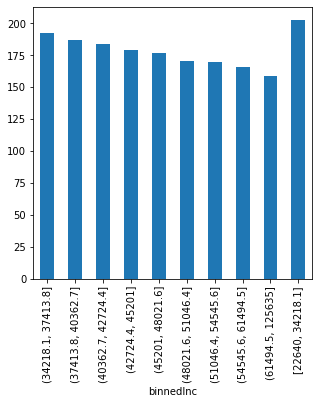

In [33]:
bar = CancerData.groupby(['binnedInc']).mean()['TARGET_deathRate'].plot.bar(figsize = (5,5))

## Checking The relationship: Continuous vs Categorical (Boxplot)

<AxesSubplot:title={'center':'TARGET_deathRate'}, xlabel='binnedInc'>

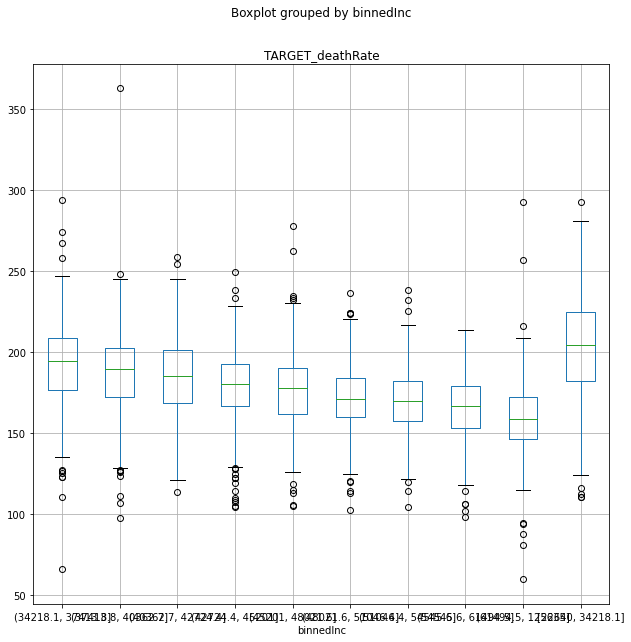

In [34]:
CancerData.boxplot(by='binnedInc', column='TARGET_deathRate', figsize=(10,10))

## Checking The relationship: Continuous vs Categorical (P-Value)

In [43]:
from scipy.stats import f_oneway
categrpList = CancerData.groupby(['binnedInc'])['TARGET_deathRate'].apply(list)
ANOVA = f_oneway(*categrpList)
print(np.round(ANOVA[1],decimals = 10))

0.0


In [44]:
CancerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   incidenceRate           3047 non-null   float64
 3   medIncome               3047 non-null   int64  
 4   popEst2015              3047 non-null   int64  
 5   povertyPercent          3047 non-null   float64
 6   studyPerCap             3047 non-null   float64
 7   binnedInc               3047 non-null   object 
 8   MedianAge               3047 non-null   float64
 9   MedianAgeMale           3047 non-null   float64
 10  MedianAgeFemale         3047 non-null   float64
 11  AvgHouseholdSize        3047 non-null   float64
 12  PercentMarried          3047 non-null   float64
 13  PctNoHS18_24            3047 non-null   float64
 14  PctHS18_24              3047 non-null   

## Mapping the object variable to Numeric: 'binnedInc'

In [36]:
MapResult = {'(61494.5, 125635]':10, '(48021.6, 51046.4]':7, '(42724.4, 45201]':5,
       '(51046.4, 54545.6]':8, '(37413.8, 40362.7]':3, '(40362.7, 42724.4]':4,
       '(54545.6, 61494.5]':9, '(34218.1, 37413.8]':2, '[22640, 34218.1]':1,
       '(45201, 48021.6]':6}

In [37]:
CancerData['binnedInc'] = CancerData['binnedInc'].map(MapResult)

In [38]:
CancerData.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,10,39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,7,33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,7,45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,5,42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,7,48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


In [39]:
CancerData['binnedInc'].unique()

array([10,  7,  5,  8,  3,  4,  9,  2,  1,  6], dtype=int64)

## Treating Missing values

In [40]:
CancerData.isna().sum()

avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
binnedInc                   0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over        152
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
TARGET_deathRate            0
dtype: int64

In [41]:
CancerData['PctEmployed16_Over'] = CancerData['PctEmployed16_Over'].fillna(CancerData['PctEmployed16_Over'].median())

In [42]:
CancerData['PctEmployed16_Over'].isna().sum()

0

## Selecting Target and Predictor variable

In [43]:
Predictors = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24',
       'PctBlack', 'binnedInc']
Target = ['TARGET_deathRate']
X = CancerData[Predictors].values
y = CancerData[Target].values

## Splitting the data into training and testing

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2132, 17)
(2132, 1)
(915, 17)
(915, 1)


## Linear Regression

In [46]:
#building linear regression model :
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lrRegModel.predict(X_test)

#evaluating the model
from sklearn.metrics import r2_score
print('R2 value', r2_score(y_train, lrRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

#making dataframe from the test dataset
TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = lrPrediction
TestingData['APE'] = (np.abs(y_test-lrPrediction)/y_test)*100
TestingData.head()

R2 value 0.5241561023118857
Accuracy 90.7835592230839


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,Target,PredictedValue,APE
0,12.0,477.4,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5.0,186.5,185.382452,0.599222
1,22.3,450.2,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6.0,152.5,162.024690,6.245698
2,23.0,508.7,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10.0,174.2,167.999249,3.559558
3,6.8,484.4,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3.0,207.6,194.621479,6.251696
4,11.5,457.7,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7.0,192.0,183.121191,4.624380


## Decision Tree

In [48]:
#building the decision tree model

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6, criterion='mse')
dtRegModel = dt.fit(X_train, y_train)
dtPrediction = dtRegModel.predict(X_test)
print('R2 value', r2_score(y_train, dtRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-dtPrediction)/y_test))*100))

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = dtPrediction

TestingData.head()

R2 value 0.6038061546949205
Accuracy 83.65543988516201


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,Target,PredictedValue
0,12.0,477.4,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5.0,186.5,186.757639
1,22.3,450.2,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6.0,152.5,167.493617
2,23.0,508.7,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10.0,174.2,156.828571
3,6.8,484.4,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3.0,207.6,202.886420
4,11.5,457.7,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7.0,192.0,175.212030


## Random Forest

In [49]:
#building the random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=1, criterion='mse', n_estimators=100)
rfRegModel = rf.fit(X_train, y_train)
rfPrediction = rfRegModel.predict(X_test)

#evaluating the model
print('R2 value', r2_score(y_train, rfRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-rfPrediction)/y_test))*100))

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = rfPrediction
TestingData.head()

<ipython-input-49-870d0588beaf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfRegModel = rf.fit(X_train, y_train)


R2 value 0.197893986056912
Accuracy 85.89014790776744


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,Target,PredictedValue
0,12.0,477.4,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5.0,186.5,169.686897
1,22.3,450.2,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6.0,152.5,169.460503
2,23.0,508.7,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10.0,174.2,169.239207
3,6.8,484.4,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3.0,207.6,193.548776
4,11.5,457.7,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7.0,192.0,171.109672


## AdaBoost

In [51]:
#building adaboost model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
adab = AdaBoostRegressor(n_estimators=100, base_estimator=dt, learning_rate=0.1)
adabRegModel = adab.fit(X_train, y_train)
adabPrediction = adabRegModel.predict(X_test)

#evaluating the model
print('R2 value', r2_score(y_train, adabRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-adabPrediction)/y_test))*100))

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = adabPrediction
TestingData.head()

C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 value 0.2493795062495251
Accuracy 86.37610744675568


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,Target,PredictedValue
0,12.0,477.4,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5.0,186.5,180.373846
1,22.3,450.2,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6.0,152.5,179.234268
2,23.0,508.7,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10.0,174.2,180.173022
3,6.8,484.4,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3.0,207.6,192.177003
4,11.5,457.7,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7.0,192.0,180.331566


## XGBoost

In [57]:
#building the XGBoost model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.2, booster='gbtree')
xgbRegModel = xgb.fit(X_train, y_train)
xgbPrediction = xgbRegModel.predict(X_test)

#evaluating the model
print('R2 value', r2_score(y_train, xgbRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-xgbPrediction)/y_test))*100))

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = xgbPrediction

TestingData.head()

R2 value 0.9999999882967858
Accuracy 83.37193312694392


,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,Target,PredictedValue
0,12.0,477.4,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5.0,186.5,190.881760
1,22.3,450.2,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6.0,152.5,169.357254
2,23.0,508.7,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10.0,174.2,157.330170
3,6.8,484.4,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3.0,207.6,199.766327
4,11.5,457.7,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7.0,192.0,187.791412


## Clearly the most accurate model is Linear regression which is giving 90% accuracy.

## Tuning the hyperparameters using grid search

In [60]:
# automating the process of checking for the best parameters for Linear Regression model
#tuning the hyperparameters

def LinearRegressionParams(X_train, y_train, X_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    random_state_list = [42,775,687]
    TrialNo = 0
    for Test_size in test_size_list:
        for Random_state in random_state_list:
            TrialNo+=1
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_size, random_state = Random_state)
            lr = LinearRegression()
            lrRegModel = lr.fit(X_train, y_train)
            lrPrediction = lrRegModel.predict(X_test)
            print(TrialNo, 'Random_state', Random_state, '--> Test_size', Test_size, '--> Accuracy',100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

In [61]:
LinearRegressionParams(X_train, y_train, X_test, y_test)

1 Random_state 42 --> Test_size 0.2 --> Accuracy 91.0479232873531
2 Random_state 775 --> Test_size 0.2 --> Accuracy 91.60874181922708
3 Random_state 687 --> Test_size 0.2 --> Accuracy 91.79408332655194
4 Random_state 42 --> Test_size 0.25 --> Accuracy 90.9138253435883
5 Random_state 775 --> Test_size 0.25 --> Accuracy 91.39588164811218
6 Random_state 687 --> Test_size 0.25 --> Accuracy 91.5407370197706
7 Random_state 42 --> Test_size 0.3 --> Accuracy 90.7835592230839
8 Random_state 775 --> Test_size 0.3 --> Accuracy 91.55115344088044
9 Random_state 687 --> Test_size 0.3 --> Accuracy 91.604803164541


In [62]:
# AdaBoost
def AdaboostParams(X_train, y_train, X_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    random_state_list = [42,775,687]
    N_Estimators_list = [500, 550, 600]
    TrialNo = 0
    for Test_size in test_size_list:
        for Random_state in random_state_list:
            for N_Estimators in N_Estimators_list:
                TrialNo+=1
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_size, random_state = Random_state)
                adab = AdaBoostRegressor(n_estimators=N_Estimators, base_estimator=dt, learning_rate= 0.2)
                adabRegModel = adab.fit(X_train, y_train)
                adabPrediction = adabRegModel.predict(X_test)
                Accuracy = 100-(np.mean((np.abs(y_test-adabPrediction)/y_test))*100)
                print(TrialNo, 'Random_state', Random_state,
                      '--> Test_size', Test_size, 'n_estimators',N_Estimators, '--> Accuracy', Accuracy)

In [63]:
AdaboostParams(X_train, y_train, X_test, y_test)

C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1 Random_state 42 --> Test_size 0.2 n_estimators 500 --> Accuracy 86.46545665360509


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


2 Random_state 42 --> Test_size 0.2 n_estimators 550 --> Accuracy 86.43746366973983


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


3 Random_state 42 --> Test_size 0.2 n_estimators 600 --> Accuracy 86.40632955759837


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


4 Random_state 775 --> Test_size 0.2 n_estimators 500 --> Accuracy 86.13544695717167


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


5 Random_state 775 --> Test_size 0.2 n_estimators 550 --> Accuracy 86.13171006071266


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


6 Random_state 775 --> Test_size 0.2 n_estimators 600 --> Accuracy 85.96434157978277


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


7 Random_state 687 --> Test_size 0.2 n_estimators 500 --> Accuracy 87.66744527722469


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


8 Random_state 687 --> Test_size 0.2 n_estimators 550 --> Accuracy 87.75248682035136


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


9 Random_state 687 --> Test_size 0.2 n_estimators 600 --> Accuracy 87.60531451441247


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


10 Random_state 42 --> Test_size 0.25 n_estimators 500 --> Accuracy 86.19839608243839


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


11 Random_state 42 --> Test_size 0.25 n_estimators 550 --> Accuracy 86.19805700026174


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


12 Random_state 42 --> Test_size 0.25 n_estimators 600 --> Accuracy 86.17051850211526


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


13 Random_state 775 --> Test_size 0.25 n_estimators 500 --> Accuracy 85.78476323245751


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


14 Random_state 775 --> Test_size 0.25 n_estimators 550 --> Accuracy 85.92249852773183


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


15 Random_state 775 --> Test_size 0.25 n_estimators 600 --> Accuracy 85.98868872039569


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


16 Random_state 687 --> Test_size 0.25 n_estimators 500 --> Accuracy 87.37471136705555


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


17 Random_state 687 --> Test_size 0.25 n_estimators 550 --> Accuracy 87.39390369826741


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


18 Random_state 687 --> Test_size 0.25 n_estimators 600 --> Accuracy 87.43792227541095


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


19 Random_state 42 --> Test_size 0.3 n_estimators 500 --> Accuracy 86.38146006225499


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


20 Random_state 42 --> Test_size 0.3 n_estimators 550 --> Accuracy 86.39399121896304


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


21 Random_state 42 --> Test_size 0.3 n_estimators 600 --> Accuracy 86.3843970306553


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


22 Random_state 775 --> Test_size 0.3 n_estimators 500 --> Accuracy 85.7909159317134


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


23 Random_state 775 --> Test_size 0.3 n_estimators 550 --> Accuracy 85.70346669103444


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


24 Random_state 775 --> Test_size 0.3 n_estimators 600 --> Accuracy 85.9302126137353


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


25 Random_state 687 --> Test_size 0.3 n_estimators 500 --> Accuracy 87.31611202354954


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


26 Random_state 687 --> Test_size 0.3 n_estimators 550 --> Accuracy 87.24135456458711


C:\Users\Akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


27 Random_state 687 --> Test_size 0.3 n_estimators 600 --> Accuracy 87.33324180936918


In [64]:
# Random Forest
def RandomForestParams(X_train, y_train, X_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    random_state_list = [42,775,687]
    N_Estimators_list = [500, 550, 600]
    TrialNo = 0
    for Test_size in test_size_list:
        for Random_state in random_state_list:
            for N_Estimators in N_Estimators_list:
                TrialNo+=1
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = Test_size, random_state = Random_state)
                rf = RandomForestRegressor(max_depth=1, criterion='mse', n_estimators=N_Estimators)
                rfRegModel = rf.fit(X_train, y_train)
                rfPrediction = rfRegModel.predict(X_test)
                Accuracy = 100-(np.mean((np.abs(y_test-rfPrediction)/y_test))*100)
                print(TrialNo, 'Random_state', Random_state,
                      '--> Test_size', Test_size, 'n_estimators',N_Estimators, '--> Accuracy', Accuracy)

In [65]:
RandomForestParams(X_train, y_train, X_test, y_test)

1 Random_state 42 --> Test_size 0.2 n_estimators 500 --> Accuracy 86.12679328605758
2 Random_state 42 --> Test_size 0.2 n_estimators 550 --> Accuracy 86.10118727423048
3 Random_state 42 --> Test_size 0.2 n_estimators 600 --> Accuracy 86.1154671876077
4 Random_state 775 --> Test_size 0.2 n_estimators 500 --> Accuracy 86.97343176007843
5 Random_state 775 --> Test_size 0.2 n_estimators 550 --> Accuracy 86.96540967623133
6 Random_state 775 --> Test_size 0.2 n_estimators 600 --> Accuracy 87.00719756204545
7 Random_state 687 --> Test_size 0.2 n_estimators 500 --> Accuracy 87.22412850354462
8 Random_state 687 --> Test_size 0.2 n_estimators 550 --> Accuracy 87.22205546805472
9 Random_state 687 --> Test_size 0.2 n_estimators 600 --> Accuracy 87.22051896798718
10 Random_state 42 --> Test_size 0.25 n_estimators 500 --> Accuracy 85.8709628100059
11 Random_state 42 --> Test_size 0.25 n_estimators 550 --> Accuracy 85.89914309120768
12 Random_state 42 --> Test_size 0.25 n_estimators 600 --> Accuracy 

## still linear regression is the best in terms of accuracy

## Artificial Neural Network

In [64]:
# Importing Layers and Models
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
model = Sequential()
#adding 3 fully connected layers
model.add(Dense(units = 5, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'normal'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [68]:
model.fit(X_train, y_train, verbose=1, batch_size=10, epochs=20)

Epoch 1/20
214/214 [==============================] - 0s 2ms/step - loss: 5165.7588
Epoch 2/20
214/214 [==============================] - 0s 1ms/step - loss: 3437.1174
Epoch 3/20
214/214 [==============================] - 0s 1ms/step - loss: 3246.8113
Epoch 4/20
214/214 [==============================] - 0s 1ms/step - loss: 2918.6021
Epoch 5/20
214/214 [==============================] - 0s 1ms/step - loss: 1913.0267
Epoch 6/20
214/214 [==============================] - 0s 1ms/step - loss: 713.8416A: 0s - loss: 758.208
Epoch 7/20
214/214 [==============================] - 0s 1ms/step - loss: 483.3378
Epoch 8/20
214/214 [==============================] - 0s 1ms/step - loss: 467.9996
Epoch 9/20
214/214 [==============================] - 0s 1ms/step - loss: 455.9801
Epoch 10/20
214/214 [==============================] - 0s 1ms/step - loss: 447.5056
Epoch 11/20
214/214 [==============================] - 0s 1ms/step - loss: 435.7913
Epoch 12/20
214/214 [==============================] - 0s 1

## Finding best set of parameters using grid search

In [69]:
def ANNBestParams(X_train, y_train, X_test, y_test):
    test_size_list = [0.2,0.25,0.3]
    Batch_size_list = [5,10,15]
    Epochs_list = [10,50,100]
    TrialNo = 0
    for test_size in test_size_list:
        for Batch_size in Batch_size_list:
            for Epochs in Epochs_list:
                TrialNo+=1
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
                model = Sequential()
                model.add(Dense(units = 5, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
                model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'relu'))
                model.add(Dense(units = 1, kernel_initializer = 'normal'))
                model.compile(loss = 'mean_squared_error', optimizer = 'adam')
                model.fit(X_train, y_train, verbose=0, batch_size=Batch_size, epochs=Epochs)
                Prediction = model.predict(X_test)
                print(TrialNo, '--> Test_size', test_size, 'batch_size', Batch_size, 'epochs', Epochs,
                      '--> Accuracy',100-(np.mean((np.abs(y_test-Prediction)/y_test))*100))

In [70]:
ANNBestParams(X_train, y_train, X_test, y_test)

1 --> Test_size 0.2 batch_size 5 epochs 10 --> Accuracy 90.12120204192436
2 --> Test_size 0.2 batch_size 5 epochs 50 --> Accuracy 13.88333480809058
3 --> Test_size 0.2 batch_size 5 epochs 100 --> Accuracy 90.86075535494665
4 --> Test_size 0.2 batch_size 10 epochs 10 --> Accuracy 90.66982183072935
5 --> Test_size 0.2 batch_size 10 epochs 50 --> Accuracy 90.27731986321398
6 --> Test_size 0.2 batch_size 10 epochs 100 --> Accuracy 90.99349409095149
7 --> Test_size 0.2 batch_size 15 epochs 10 --> Accuracy 90.8046864683922
8 --> Test_size 0.2 batch_size 15 epochs 50 --> Accuracy 90.80829414473128
9 --> Test_size 0.2 batch_size 15 epochs 100 --> Accuracy 90.79987757515512
10 --> Test_size 0.25 batch_size 5 epochs 10 --> Accuracy 88.9784526510966
11 --> Test_size 0.25 batch_size 5 epochs 50 --> Accuracy 90.51254480945666
12 --> Test_size 0.25 batch_size 5 epochs 100 --> Accuracy 89.8064500089109
13 --> Test_size 0.25 batch_size 10 epochs 10 --> Accuracy 86.81056781159353
14 --> Test_size 0.25 

### Generating the model using best hyperparameters

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2437, 17)
(2437, 1)
(610, 17)
(610, 1)


In [73]:
model.fit(X_train, y_train, epochs=50, batch_size=15, verbose=0)

### Generating the predictions on Testing Data

In [74]:
ANNPrediction = model.predict(X_test)
TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['TARGET_deathRate'] = y_test
TestingData['Predicted_deathRate'] = ANNPrediction
TestingData.head()

,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,povertyPercent,medIncome,PctEmployed16_Over,PctHS25_Over,PctPublicCoverage,PctPrivateCoverage,PctUnemployed16_Over,PctMarriedHouseholds,PctBachDeg18_24,PctEmpPrivCoverage,PercentMarried,PctHS18_24,PctBlack,binnedInc,TARGET_deathRate,Predicted_deathRate
0,12.0,477.4,22.7,19.1,44358.0,51.9,31.0,41.4,62.3,10.6,51.807095,3.7,40.2,52.9,34.5,0.437922,5.0,186.5,182.562225
1,22.3,450.2,13.5,22.6,47966.0,59.6,22.8,24.6,77.3,6.5,39.728702,14.3,54.5,39.3,14.3,12.588086,6.0,152.5,151.891632
2,23.0,508.7,11.2,7.2,71885.0,62.8,25.9,27.1,82.6,6.0,52.770765,13.5,60.9,54.0,26.0,1.611447,10.0,174.2,157.425720
3,6.8,484.4,21.0,15.7,37961.0,36.1,41.9,53.1,60.8,16.0,49.213759,3.5,27.5,51.5,26.3,0.361664,3.0,207.6,188.884552
4,11.5,457.7,18.3,13.0,49698.0,59.0,35.0,28.5,62.1,10.1,55.195246,2.1,46.4,52.0,38.3,11.578626,7.0,192.0,174.165558


## Calculating the Accuracy

In [75]:
100-(np.mean((np.abs(TestingData['TARGET_deathRate']-TestingData['Predicted_deathRate'])/TestingData['TARGET_deathRate']))*100)

90.75915100013886

## Artificial neural network and Linear regression give the best accuracy that is 90.75